### Explorando datos

Vamos a trabajar con un dataset que contiene datos de clientes de un [banco](https://www.kaggle.com/ninzaami/loan-predication) y que puede ser utilizado para predecir faltas en el pago de prestamos. En el Drive esta descargado el archivo. Si tenes inconvenientes o  ese archivo no funciona podes descargarlo directamente de la página web.

Realizaremos una exploración y visualización de los datos.

#### Importa las librerias necesarias

1) Importa las librerias que te van a ser utiles para el análisis. Vamos a usar leer y manipular datos. Además vamos a hacer un par de visualizaciones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Lee los datos

2) Lee los datos que se encuentran en el archivo `prestamos.csv`. Guardalos en un DataFrame. Inspecciona las primeras filas para observar como se ven los datos.

In [2]:
df = pd.read_csv("../4.Datasets/prestamos.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

Luego de un analisis general (Lo podes hacer despues, ahora nos concentraremos en el analisis subsiguiente), observaremos que el DataFrame tiene 614 filas (muestras) y 13 columnas (caracteristicas de los datos). Ademas, las variables `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `Property_Area` y `Loan_Status` son objetos o strings. La variable `ApplicantIncome` es del tipo entero mientras que `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term` y `Credit_History` son de tipo numero flotante.

#### Visualizando algunas variables

Estamos interesados ahora en explorar la variable `LoanAmount` que nos indica en cada caso cual fue el monto total del prestamo otorgado. Sabemos que este dato es del tipo numero flotante. 

3) ¿Que tipo de estadisticos podemos calcular para describir esta variable (ejemplo: media o promedio)? Calculalos

In [5]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [6]:
#Preprocesamiento de datos: borrar NaN
df['LoanAmount'].isnull().sum()

22

4) ¿Que tipo de gráfico eligirias para poder ver la distribución de esta variable? ¿Por qué? Graficala.

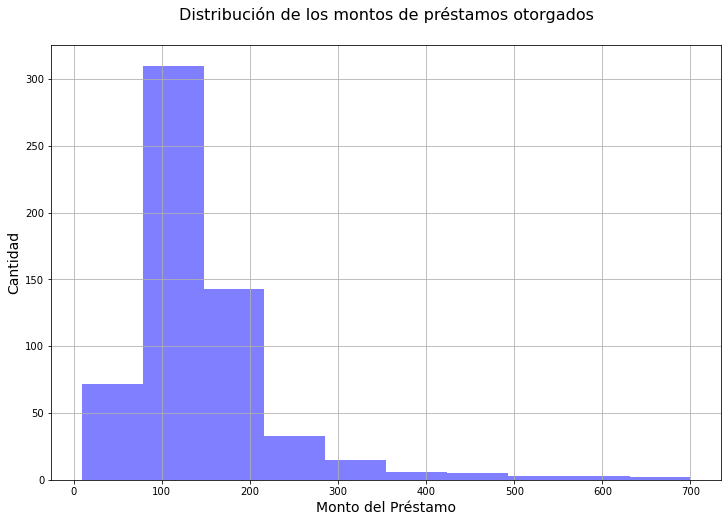

In [7]:
#Creo el grágico y seteo el tamaño:
plt.figure(figsize=(12,8))

#Elijo el tipo de gráfico con los datos, el color y la opacidad, entre otros.
plt.hist(df['LoanAmount'].dropna(), color='blue', alpha=0.5)

#Elijo los títulos de los ejes con sus estilos:
plt.ylabel('Cantidad', size=14)
plt.xlabel('Monto del Préstamo', size=14)
plt.title('Distribución de los montos de préstamos otorgados', size=16, pad=25)

#Ajustes adicionales:
plt.grid()

#Mostar el gráfico:
plt.show();

#### Filtrá los datos

5) Chequea que categoria y cuantos datos aparecen en las columnas `Property_Area` y `Married`.

In [8]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

6) De las categorías existentes sólo queremos quedarnos con las muestras de personas que tengan una propiedad en la categoria Urbana (`Urban`)  y además, que esten casados. 

Filtrá el `dataframe` original creando un nuevo `DataFrame` llamado `df_urbmar`. 

In [10]:
df_urbmar = df.loc[(df['Property_Area'] == 'Urban') & (df['Married'] == 'Yes')].copy()

In [11]:
df_urbmar.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


7) Ahora estamos interesados en analizar la variable `Education`. ¿Que tipo de gráfico eligirias para poder visualizar esta variable? ¿Por qué? Graficala.

In [12]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

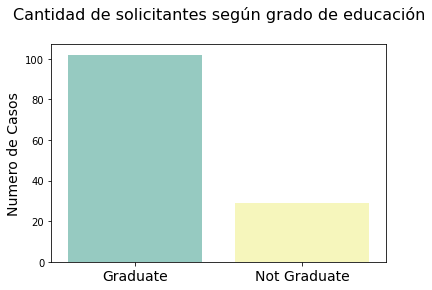

In [13]:
#Elijo el gráfico en este caso, usando Seaborn (countplot) con los datos y colores.
sns.countplot(x='Education', data=df_urbmar, palette='Set3')

#Seteos los ejes con sus títulos:
plt.ylabel('Numero de Casos', size=14)
plt.xlabel('')
plt.title('Cantidad de solicitantes según grado de educación', size=16, pad=25, loc='center')

#Ticks
plt.xticks(size=14)

#Parámetros adicionales:
plt.grid(False)

plt.show();

8) Por ultimo, vamos a analizar los valores faltantes. Mostrá que atributos tienen valores faltantes en el dataframe. No muestres los atributos que no posean valores faltantes.

In [14]:
missing_values = df_urbmar.isnull().sum()
print(missing_values[missing_values > 0])

Gender               2
Dependents           3
Self_Employed        7
LoanAmount           7
Loan_Amount_Term     4
Credit_History      13
dtype: int64


9) Elimina ahora los valores faltantes del DataFrame `df_urbmar`. No te olvides de usar inplace para modificar el dataframe original.

In [15]:
df_urbmar.dropna(inplace=True)

In [16]:
df_urbmar.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

10) **Bonus**: Utiliza seaborn para hacer un gráfico que muestre la relación entre `ApplicantIncome` y `LoanAmount`, coloreando los puntos de acuerdo al tipo de educación que posean. ¿Que tipo de grafico utilizarias? ¿Por qué?

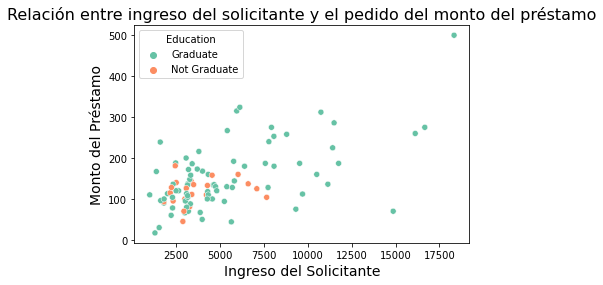

In [17]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df_urbmar, hue='Education', palette='Set2')

plt.xlabel('Ingreso del Solicitante', size=14)
plt.ylabel('Monto del Préstamo', size=14)
plt.title('Relación entre ingreso del solicitante y el pedido del monto del préstamo', size=16)

plt.grid(False)

plt.show();

In [18]:
self_amount_mean=df.groupby(['Self_Employed','Property_Area']).LoanAmount.mean()
self_amount_mean

Self_Employed  Property_Area
No             Rural            149.079710
               Semiurban        143.973404
               Urban            132.583333
Yes            Rural            185.400000
               Semiurban        155.000000
               Urban            179.291667
Name: LoanAmount, dtype: float64

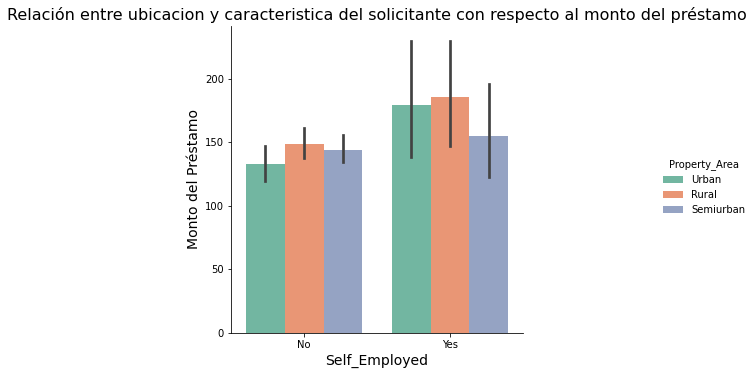

In [19]:
sns.catplot(x = 'Self_Employed', y ='LoanAmount', kind = "bar", data = df, hue = 'Property_Area', palette='Set2')
plt.xlabel('Self_Employed', size=14)
plt.ylabel('Monto del Préstamo', size=14)
plt.title('Relación entre ubicacion y caracteristica del solicitante con respecto al monto del préstamo', size=16)

plt.grid(False)

plt.show();

In [36]:
df.groupby(['Self_Employed','Property_Area']).Loan_ID.count().mean()

97.0

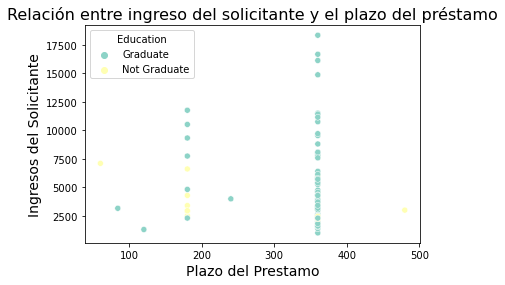

In [20]:
sns.scatterplot(x='Loan_Amount_Term', y='ApplicantIncome', data=df_urbmar, hue='Education', palette='Set3')

plt.xlabel('Plazo del Prestamo', size=14)
plt.ylabel('Ingresos del Solicitante', size=14)
plt.title('Relación entre ingreso del solicitante y el plazo del préstamo', size=16)

plt.grid(False)

plt.show();

In [39]:
df_urbmar['Loan_Amount_Term'].value_counts()

360.0    83
180.0    12
120.0     1
60.0      1
240.0     1
480.0     1
84.0      1
Name: Loan_Amount_Term, dtype: int64

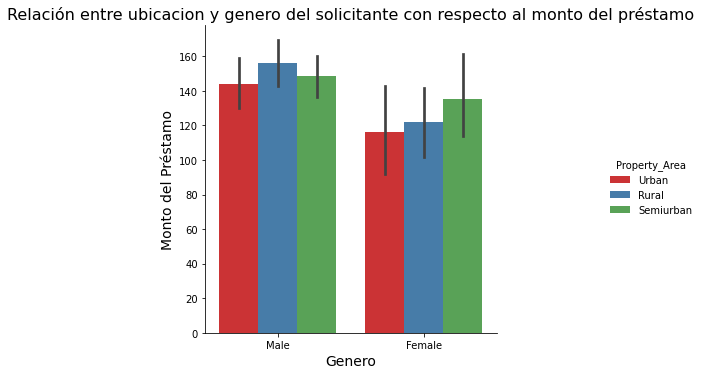

In [21]:
sns.catplot(x = 'Gender', y ='LoanAmount', kind = "bar", data = df, hue = 'Property_Area', palette='Set1')
plt.xlabel('Genero', size=14)
plt.ylabel('Monto del Préstamo', size=14)
plt.title('Relación entre ubicacion y genero del solicitante con respecto al monto del préstamo', size=16)

plt.grid(False)

plt.show();

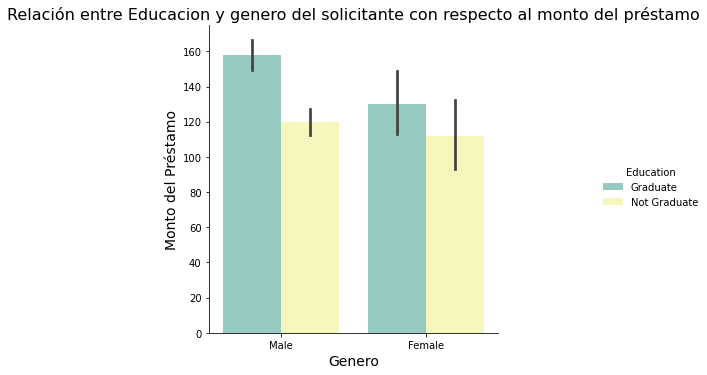

In [22]:
sns.catplot(x = 'Gender', y ='LoanAmount', kind = "bar", data = df, hue = 'Education', palette='Set3')
plt.xlabel('Genero', size=14)
plt.ylabel('Monto del Préstamo', size=14)
plt.title('Relación entre Educacion y genero del solicitante con respecto al monto del préstamo', size=16)

plt.grid(False)

plt.show();

In [23]:
df['CoapplicantIncome'].isnull().sum()

0

In [24]:
df.groupby(['Married']).CoapplicantIncome.count()

Married
No     213
Yes    398
Name: CoapplicantIncome, dtype: int64

In [25]:
monto=df.groupby('Property_Area').LoanAmount.sum()
monto

Property_Area
Rural        26341.0
Semiurban    33175.0
Urban        27160.0
Name: LoanAmount, dtype: float64

In [26]:
cantidad_sol=df.groupby('Property_Area').Loan_ID.count()
cantidad_sol

Property_Area
Rural        179
Semiurban    233
Urban        202
Name: Loan_ID, dtype: int64

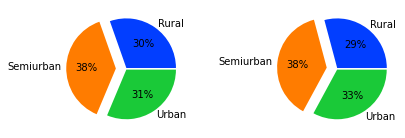

In [27]:
plt.subplot(1,2,1)
labels = ['Rural', 'Semiurban', 'Urban']
colors = sns.color_palette('bright')
plt.pie(monto, labels=labels,colors = colors, autopct = '%0.0f%%', explode=[0.02, 0.2, 0.02])
plt.subplot(1,2,2)
labels = ['Rural', 'Semiurban', 'Urban']
colors = sns.color_palette('bright')
plt.pie(cantidad_sol, labels=labels,colors = colors, autopct = '%0.0f%%', explode=[0.02, 0.2, 0.02])
plt.subplots_adjust(wspace=0.7)
plt.show()

crear grafico con subplots asi modifico tamaño-